# Download dataset

In [1]:
!pip install gdown
!mkdir "Dataset1"

mkdir: cannot create directory ‘Dataset1’: File exists


In [2]:
!gdown "1Wuylmlc_ugmJb3Pf1gX2oC6rUH98pgzs" -O "Latihan_Dataset.zip"
!unzip "Latihan_Dataset.zip" -d "Dataset1/"

Downloading...
From (original): https://drive.google.com/uc?id=1Wuylmlc_ugmJb3Pf1gX2oC6rUH98pgzs
From (redirected): https://drive.google.com/uc?id=1Wuylmlc_ugmJb3Pf1gX2oC6rUH98pgzs&confirm=t&uuid=8cb4f558-82b9-48d9-a4fd-eb174e2f6726
To: /content/Latihan_Dataset.zip
100% 104M/104M [00:00<00:00, 134MB/s] 
Archive:  Latihan_Dataset.zip
replace Dataset1/sunflower/10386503264_e05387e1f7_m.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Dataset1/sunflower/10386503264_e05387e1f7_m.jpg  
  inflating: Dataset1/sunflower/10386522775_4f8c616999_m.jpg  
  inflating: Dataset1/sunflower/10386525005_fd0b7d6c55_n.jpg  
  inflating: Dataset1/sunflower/10386525695_2c38fea555_n.jpg  
  inflating: Dataset1/sunflower/10386540106_1431e73086_m.jpg  
  inflating: Dataset1/sunflower/10386540696_0a95ee53a8_n.jpg  
  inflating: Dataset1/sunflower/10386702973_e74a34c806_n.jpg  
  inflating: Dataset1/sunflower/10862313945_e8ed9202d9_m.jpg  
  inflating: Dataset1/sunflower/11881770944_22b4f2f8f6_n.jpg  
 

# Import Library

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import pathlib

# Constant Variable

In [4]:
tf.random.set_seed(42)
np.random.seed(42)

IMG_HEIGHT, IMG_WIDTH = 300, 300
BATCH_SIZE = 32
EPOCHS = 100
NUM_CLASSES = 3
CLASSES = ["daisy", "sunflower", "tulip"]
DATASET_PATH = "./Dataset1/"

# Load the Data

In [5]:
data_dir = pathlib.Path(DATASET_PATH)

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 1603 files belonging to 3 classes.
Using 1283 files for training.
Found 1603 files belonging to 3 classes.
Using 320 files for validation.


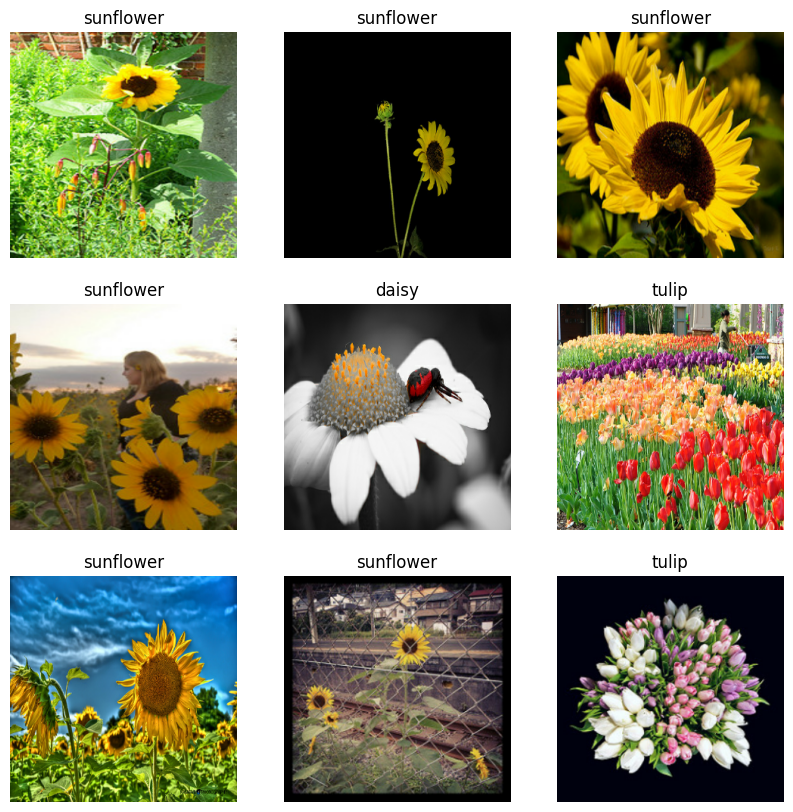

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(CLASSES[labels[i]])
    plt.axis("off")

# Model

In [8]:
model = Sequential([
    Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 298, 298, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 156800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      80,282,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,376,899 (306.61 MB)

 Trainable params: 80,376,899 (306.61 MB)

 Non-trainable params: 0 (0.00 B)

# Pelatihan Model

In [11]:
history = model.fit(train_ds, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_ds)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 24s 316ms/step - accuracy: 0.5019 - loss: 1.6664 - val_accuracy: 0.7563 - val_loss: 0.7626
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.7668 - loss: 0.6625 - val_accuracy: 0.6938 - val_loss: 0.7870
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.7776 - loss: 0.5875 - val_accuracy: 0.8125 - val_loss: 0.5968
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.8229 - loss: 0.4554 - val_accuracy: 0.7812 - val_loss: 0.6044
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.8545 - loss: 0.4004 - val_accuracy: 0.8031 - val_loss: 0.6056
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.9048 - loss: 0.2741 - val_accuracy: 0.8250 - val_loss: 0.7397
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.9370 - loss: 0.2019 - val_accuracy: 0.7656 - val_loss: 0.9520
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - accuracy: 0.9527 - loss: 0.1727 - val_acc

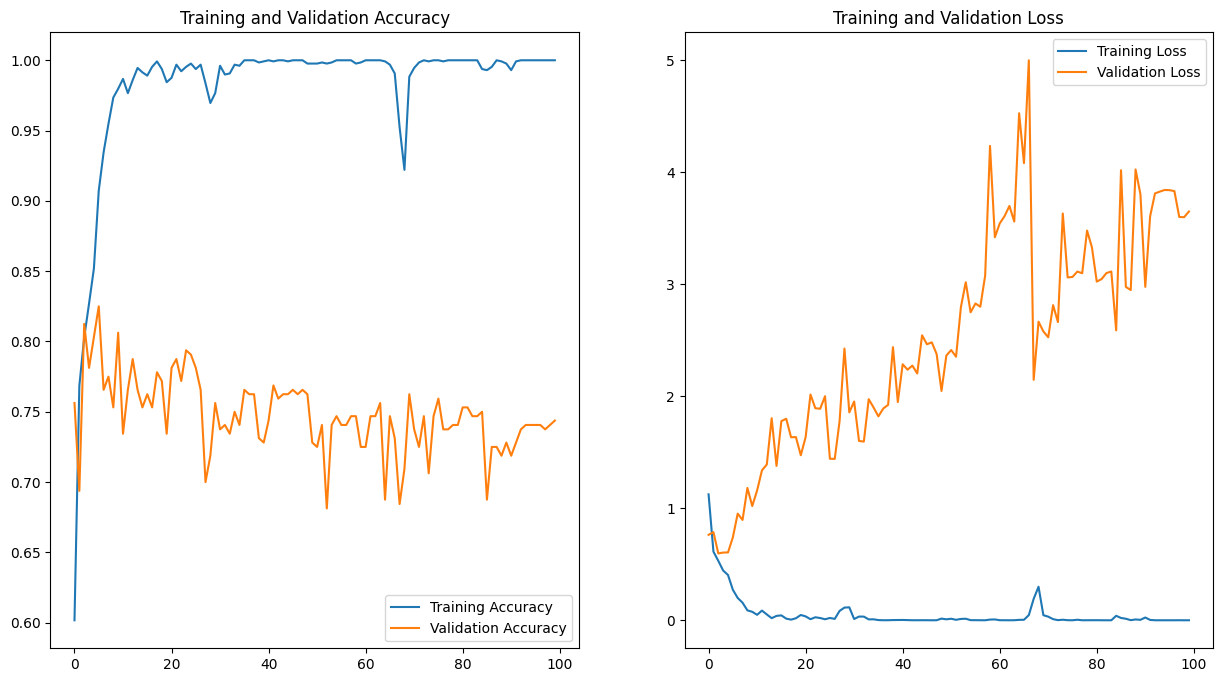

In [12]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['loss'], label='Training Loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [13]:
loss, accuracy = model.evaluate(val_ds)
print('Test accuracy :', accuracy)
print('Test loss :', loss)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7492 - loss: 3.1614
Test accuracy : 0.7437499761581421
Test loss : 3.6488165855407715


In [14]:
y_true = []
y_pred = []

for images, labels in val_ds:
    batch_predictions = model.predict(images)
    batch_pred_labels = np.argmax(batch_predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(batch_pred_labels)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [15]:
print(classification_report(y_true, y_pred, target_names=CLASSES))

              precision    recall  f1-score   support

       daisy       0.70      0.74      0.72       102
   sunflower       0.74      0.72      0.73        96
       tulip       0.78      0.77      0.78       122

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



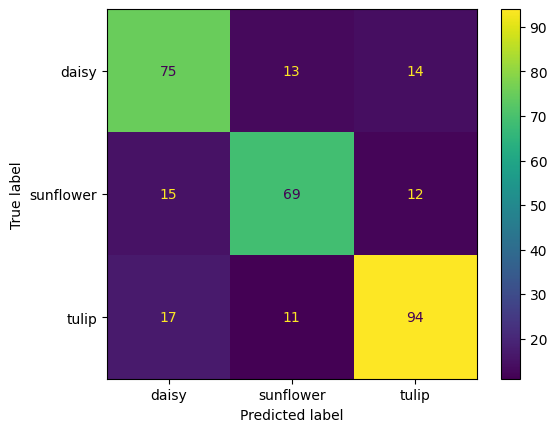

In [16]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASSES)
disp.plot()
plt.show()